In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.datasets import load_digits
%matplotlib inline

digit=load_digits()
p=digit.data
q=digit.target
p.shape, q.shape

((1797, 64), (1797,))

In [2]:
from sklearn.model_selection import train_test_split
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.4)
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(p_train,q_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [3]:
pred=model.predict(p_test)
result=pd.DataFrame({"Predicted":pred,"Actual":q_test})
result.head()

,Predicted,Actual
0,0,0
1,4,4
2,2,2
3,2,2
4,7,7


In [4]:
model.score(p_test,q_test)*100

97.49652294853965

In [5]:
kfold=model_selection.KFold(n_splits=10,random_state=7)
res1=model_selection.cross_val_score(model,p,q,cv=kfold,scoring="accuracy")      
res1

array([0.92777778, 0.98888889, 0.98888889, 0.97777778, 0.96111111,
       0.97777778, 0.98888889, 0.98324022, 0.98324022, 0.96089385])

In [6]:
res1.sum()/10

0.9738485412787089

In [7]:
res2=model_selection.cross_val_score(model,p,q,cv=kfold,scoring="neg_log_loss")
res2

array([-0.66831426, -0.02962516, -0.07148313, -0.06420906, -0.43955895,
       -0.03856648, -0.03964212, -0.0349096 , -0.25194677, -0.45336659])

In [8]:
res2.sum()/10

-0.20916221370203658

In [9]:
res3=model_selection.cross_val_score(model,p,q,cv=kfold,scoring="r2")
res3

array([0.79070984, 0.96508651, 0.9865416 , 0.89711804, 0.86423228,
       0.93159295, 0.96400498, 0.93248526, 0.93913773, 0.9148542 ])

In [10]:
res3.sum()/10

0.9185763399522179

In [11]:
print(classification_report(q_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        60
          1       0.94      1.00      0.97        78
          2       1.00      0.99      0.99        76
          3       0.96      0.99      0.97        73
          4       1.00      0.95      0.98        66
          5       0.98      0.98      0.98        87
          6       0.99      1.00      0.99        75
          7       0.96      1.00      0.98        64
          8       0.99      0.89      0.94        75
          9       0.95      0.95      0.95        65

avg / total       0.98      0.97      0.97       719



In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(q_test,pred)

array([[60,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 78,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 75,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 72,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  0,  0, 85,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 75,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 64,  0,  0],
       [ 0,  4,  0,  3,  0,  0,  0,  0, 67,  1],
       [ 0,  1,  0,  0,  0,  2,  0,  0,  0, 62]], dtype=int64)

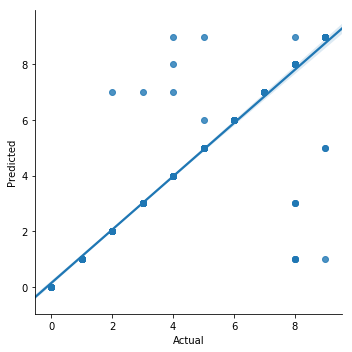

In [13]:
sns.lmplot('Actual',y='Predicted',data = result)

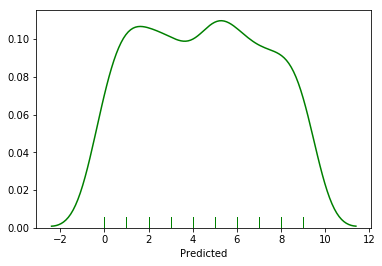

In [14]:
sns.distplot(result['Predicted'],kde=True, color="green", hist=False, rug=True)